In [1]:
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

# You'll generate plots of attention in order to see which p arts of an image
# our model focuses on during captioning
import matplotlib.pyplot as plt

# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import numpy as np  
import os
import time
import json
from glob import glob
from PIL import Image
import pickle
import cv2
from sklearn.utils import shuffle

from IPython.display import clear_output, display
import os.path
from os import path
import shutil
import PIL
from pathlib import Path
from matplotlib import pyplot as plt

from IPython.display import clear_output

import numpy as np

from PIL import ImageFont
from PIL import Image, ImageDraw
from PIL import ImageColor

from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

import random

import time
import shutil
import uuid
from shutil import copyfile
from collections import Counter

import json

from scipy.ndimage.filters import gaussian_filter1d
from matplotlib.pyplot import figure

In [2]:
def read_all(paths):
    lines=[]
    for path in paths:
        print( 'reading ', path)
        with open(path) as f:
            lines.extend( f.readlines())
    return lines

In [15]:
def get_for_unico():
    folder = 'C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log' 
    lines = read_all( [
        os.path.join( folder, 'train_comparativo_20211106_handwritten_teacher_10k_500epoch_---8linhas-handwritten--10k.txt'),
    ])
    logs = [json.loads( line) for line in lines]
    train_loss = [log['train_loss'] for log in logs]
    valid_loss = [log['valid_loss'] for log in logs]
    train_acc = [log['train_acc'] for log in logs]
    valid_acc = [log['valid_acc'] for log in logs]
    test_acc = [log['test_acc'][0][0][-1] for log in logs]
    test_acc0 = [log['test_acc'][0][0][0] for log in logs]
    
    return train_loss, valid_loss, test_acc, train_acc, valid_acc, test_acc0
currUnico_train_loss, currUnico_valid_loss, currUnico_test_acc, currUnico_train_acc, currUnico_valid_acc, currUnico_test_acc0= get_for_unico()

reading  C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log\train_comparativo_20211106_handwritten_teacher_10k_500epoch_---8linhas-handwritten--10k.txt


In [13]:
def get_for_handwritten_teacher10k():
    folder = 'C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log' 
    lines = read_all( [
        os.path.join( folder, 'train_comparativo_20211106_handwritten_teacher_---8linhas-handwritten--5k.txt'),
        os.path.join( folder, 'train_comparativo_20211106_handwritten_teacher_10k_---8linhas-handwritten--10k.txt'),
        
    ])
    logs = [json.loads( line) for line in lines]
    train_loss = [log['train_loss'] for log in logs]
    valid_loss = [log['valid_loss'] for log in logs]
    train_acc = [log['train_acc'] for log in logs]
    valid_acc = [log['valid_acc'] for log in logs]
    test_acc = [log['test_acc'][0][0][-1] for log in logs]
    test_acc0 = [log['test_acc'][0][0][0] for log in logs]
    
    return train_loss, valid_loss, test_acc, train_acc, valid_acc, test_acc0
handTeach10_train_loss, handTeach10_valid_loss, handTeach10_test_acc, handTeach10_train_acc, handTeach10_valid_acc, handTeach10_test_acc0= get_for_handwritten_teacher10k()

reading  C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log\train_comparativo_20211106_handwritten_teacher_---8linhas-handwritten--5k.txt
reading  C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/train-folder/log\train_comparativo_20211106_handwritten_teacher_10k_---8linhas-handwritten--10k.txt


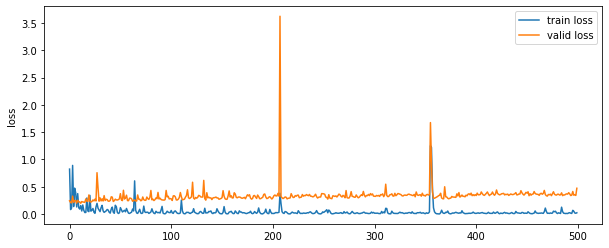

In [22]:
# plt.plot(train_loss)
figure(figsize=(10, 4))
# plt.plot(gaussian_filter1d(currUnico_train_loss, sigma=2))
# plt.plot(gaussian_filter1d(currUnico_valid_loss, sigma=2))
plt.plot(currUnico_train_loss)
plt.plot(currUnico_valid_loss)

# plt.xlabel('Tamanho da sequência considerada')
plt.ylabel('loss')
plt.gca().legend(('train loss','valid loss'))
plt.show()

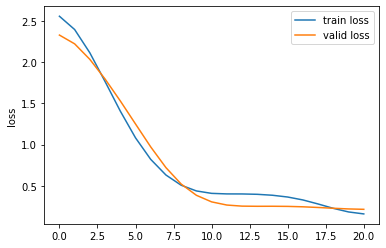

0.09523910284042358 0.19440847635269165


In [6]:
# plt.plot(train_loss)
# figure(figsize=(5, 6))
plt.plot(gaussian_filter1d(handTeach10_train_loss, sigma=2))
plt.plot(gaussian_filter1d(handTeach10_valid_loss, sigma=2))

# plt.xlabel('Tamanho da sequência considerada')
plt.ylabel('loss')
plt.gca().legend(('train loss','valid loss'))
plt.show()
print( handTeach10_train_loss[-1], handTeach10_valid_loss[-1])

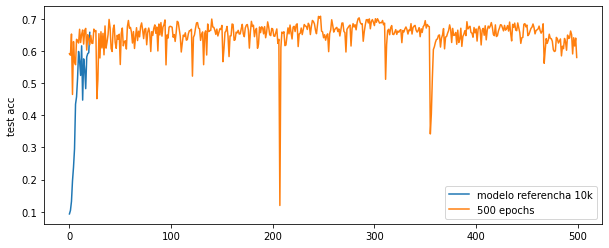

In [24]:
# plt.plot(test_acc)
figure(figsize=(10, 4))
# plt.plot(gaussian_filter1d(currUnico_test_acc, sigma=2))
# plt.plot(gaussian_filter1d(handTeach10_test_acc, sigma=2))
plt.plot(handTeach10_test_acc)
plt.plot(currUnico_test_acc)

# plt.xlabel('Tamanho da sequência considerada')
plt.ylabel('test acc')
plt.gca().legend(('modelo referencha 10k', '500 epochs'))
plt.show()

In [8]:
max( currUnico_test_acc), max( handTeach10_test_acc)

(0.7083333134651184, 0.6578947305679321)

In [9]:
np.argmax( currUnico_test_acc), np.argmax( handTeach10_test_acc)

(247, 20)

In [16]:
max( currUnico_test_acc0), max( handTeach10_test_acc0)

(0.9473684430122375, 0.9298245906829834)

In [17]:
handTeach10_test_acc0

[0.35087719559669495,
 0.429824560880661,
 0.4649122953414917,
 0.4736842215061188,
 0.3333333432674408,
 0.7017543911933899,
 0.6140350699424744,
 0.780701756477356,
 0.7017543911933899,
 0.8684210777282715,
 0.9298245906829834,
 0.7105262875556946,
 0.8333333134651184,
 0.8070175647735596,
 0.8421052694320679,
 0.8333333134651184,
 0.8070175647735596,
 0.8421052694320679,
 0.8333333134651184,
 0.8333333134651184,
 0.8508771657943726]

In [18]:
handTeach10_test_acc

[0.09320175647735596,
 0.1041666641831398,
 0.13212719559669495,
 0.19572368264198303,
 0.23848684132099152,
 0.2955043911933899,
 0.4347587823867798,
 0.45778509974479675,
 0.515350878238678,
 0.5986841917037964,
 0.5685306787490845,
 0.5241228342056274,
 0.6162280440330505,
 0.44736841320991516,
 0.5756579041481018,
 0.5433114171028137,
 0.4830043911933899,
 0.5816885828971863,
 0.5921052694320679,
 0.5948464870452881,
 0.6578947305679321]

In [19]:
currUnico_test_acc[-1]

0.5800438523292542